In [2]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import time
import math

# 1 数据读取
 - 每秒所有采集数据放置在一行，数据间用空格分隔，不同类型数据（例如空间变位的三个方向、风速和风向）之间用逗号分隔

#### 1.1 读入数据

In [2]:
# 读取数据，返回dataframe格式
def readFile(path):
    return pd.read_csv(path)
path = r"..\数据\浦仪夹江大桥数据4.27\主跨跨中空间变位GNSS-G-06.csv"
df = readFile(path)
del df['竖桥向变位']

# 数据最后一行有问题删掉
df = df[:-1]

In [3]:
df.head()

,测点编号,采集时间,纵桥向变位,横桥向变位
0,GNSS-G-06,2021-04-27 19:00:00,-5.035446361944196 -5.985044524095429 -3.69732...,-6.875547497656953 -6.876093430946639 -6.26307...
1,GNSS-G-06,2021-04-27 19:00:01,-4.654586451579235 -5.619504232527106 -5.78184...,-6.803363609833468 -7.8833933439454995 -5.9404...
2,GNSS-G-06,2021-04-27 19:00:02,-5.236091087681416 -4.8271419309458 -4.8424614...,-7.631296701219981 -5.580058223131346 -6.65954...
3,GNSS-G-06,2021-04-27 19:00:03,-6.195899016347539 -5.794612947283895 -5.21055...,-8.35149663816992 -6.840001165073772 -5.832156...
4,GNSS-G-06,2021-04-27 19:00:04,-6.17291955222754 -7.894455479799944 -5.799719...,-6.732271380315069 -7.596840719997999 -7.19983...


In [4]:
df.tail()

,测点编号,采集时间,纵桥向变位,横桥向变位
172619,GNSS-G-06,2021-04-29 18:59:52,-26.93855346478813 -27.713042912182573 -26.367...,-24.66347823065007 -25.707415890792618 -24.555...
172620,GNSS-G-06,2021-04-29 18:59:53,-26.946213309201994 -27.885598392458633 -27.90...,-25.20322058990132 -24.48411050499999 -25.7435...
172621,GNSS-G-06,2021-04-29 18:59:54,-26.58067301763367 -26.75323167022725 -26.7608...,-26.210520503809676 -24.987214843349648 -25.52...
172622,GNSS-G-06,2021-04-29 18:59:55,-27.514951490957174 -27.134091580592212 -27.52...,-25.13158216879674 -25.05939828006376 -25.4914...
172623,GNSS-G-06,2021-04-29 18:59:56,-27.319413374243595 -25.615753615056747 -26.57...,-24.73566211938305 -25.13049135086476 -25.4908...


#### 1.2  数据校验

In [5]:
# 数据类型转换
def change_datatype(df):
    df["纵桥向变位"] = df["纵桥向变位"].apply(lambda x: np.array(x.split(" "), dtype = float))
    df["横桥向变位"] = df["横桥向变位"].apply(lambda x: np.array(x.split(" "), dtype = float))
    df["采集时间"] = df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return df
df = change_datatype(df)
df.head()

,测点编号,采集时间,纵桥向变位,横桥向变位
0,GNSS-G-06,2021-04-27 19:00:00,"[-5.035446361944196, -5.985044524095429, -3.69...","[-6.875547497656953, -6.876093430946639, -6.26..."
1,GNSS-G-06,2021-04-27 19:00:01,"[-4.654586451579235, -5.619504232527106, -5.78...","[-6.803363609833468, -7.8833933439454995, -5.9..."
2,GNSS-G-06,2021-04-27 19:00:02,"[-5.236091087681416, -4.8271419309458, -4.8424...","[-7.631296701219981, -5.580058223131346, -6.65..."
3,GNSS-G-06,2021-04-27 19:00:03,"[-6.195899016347539, -5.794612947283895, -5.21...","[-8.35149663816992, -6.840001165073772, -5.832..."
4,GNSS-G-06,2021-04-27 19:00:04,"[-6.17291955222754, -7.894455479799944, -5.799...","[-6.732271380315069, -7.596840719997999, -7.19..."


In [6]:
df

,测点编号,采集时间,纵桥向变位,横桥向变位
0,GNSS-G-06,2021-04-27 19:00:00,"[-5.035446361944196, -5.985044524095429, -3.69...","[-6.875547497656953, -6.876093430946639, -6.26..."
1,GNSS-G-06,2021-04-27 19:00:01,"[-4.654586451579235, -5.619504232527106, -5.78...","[-6.803363609833468, -7.8833933439454995, -5.9..."
2,GNSS-G-06,2021-04-27 19:00:02,"[-5.236091087681416, -4.8271419309458, -4.8424...","[-7.631296701219981, -5.580058223131346, -6.65..."
3,GNSS-G-06,2021-04-27 19:00:03,"[-6.195899016347539, -5.794612947283895, -5.21...","[-8.35149663816992, -6.840001165073772, -5.832..."
4,GNSS-G-06,2021-04-27 19:00:04,"[-6.17291955222754, -7.894455479799944, -5.799...","[-6.732271380315069, -7.596840719997999, -7.19..."
...,...,...,...,...
172619,GNSS-G-06,2021-04-29 18:59:52,"[-26.93855346478813, -27.713042912182573, -26....","[-24.66347823065007, -25.707415890792618, -24...."
172620,GNSS-G-06,2021-04-29 18:59:53,"[-26.946213309201994, -27.885598392458633, -27...","[-25.20322058990132, -24.48411050499999, -25.7..."
172621,GNSS-G-06,2021-04-29 18:59:54,"[-26.58067301763367, -26.75323167022725, -26.7...","[-26.210520503809676, -24.987214843349648, -25..."
172622,GNSS-G-06,2021-04-29 18:59:55,"[-27.514951490957174, -27.134091580592212, -27...","[-25.13158216879674, -25.05939828006376, -25.4..."


In [7]:
# 查看每秒内的 风攻角 风向 合成风速 的采集次数是不是都一样多
df['check'] =1.0* len(df['纵桥向变位']) / len(df['横桥向变位'])
print(df[df['check']!=1])
del df['check']

Empty DataFrame
Columns: [测点编号, 采集时间, 纵桥向变位, 横桥向变位, check]
Index: []


 - 还好一样多，不然clean很麻烦

In [8]:
def data_verification(df):
    #统计每秒钟内的采样频率
    df["每秒采样频率"] = df["纵桥向变位"].apply(lambda x: len(x))
    print(df["每秒采样频率"].describe() ,"\n")
    
    # 校验每小时漏采或多采的情况
    tmp_Series = df["采集时间"].apply(lambda x: x.strftime("%Y-%m-%d %H时")).value_counts()
    tmp_Series.index = [datetime.datetime.strptime(x[:-1],'%Y-%m-%d %H') for x in tmp_Series.index]
    tmp_Series = tmp_Series - 60*60  #（正常情况下有3600条数据）
    print(tmp_Series)
    tmp_Series = tmp_Series.sort_index()

    plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    plt.figure (figsize= (15,4))
    plt.bar(x = tmp_Series.index[:-1], height = tmp_Series.values[:-1], width = 0.041)
    plt.xlabel("Time",fontsize='10')
    plt.ylabel("Bias",fontsize='10')
    plt.title("每小时漏采或多采的情况",fontsize='20')
    plt.plot()

count    172624.000000
mean         10.007467
std           0.656642
min           1.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         142.000000
Name: 每秒采样频率, dtype: float64 

2021-04-28 02:00:00     0
2021-04-28 13:00:00     0
2021-04-28 15:00:00     0
2021-04-28 00:00:00     0
2021-04-29 07:00:00     0
2021-04-28 18:00:00     0
2021-04-28 17:00:00     0
2021-04-27 20:00:00     0
2021-04-29 12:00:00     0
2021-04-29 09:00:00     0
2021-04-29 08:00:00     0
2021-04-29 05:00:00     0
2021-04-28 20:00:00     0
2021-04-29 14:00:00    -1
2021-04-28 06:00:00    -1
2021-04-28 10:00:00    -1
2021-04-29 15:00:00    -1
2021-04-29 00:00:00    -2
2021-04-28 01:00:00    -2
2021-04-29 17:00:00    -2
2021-04-27 19:00:00    -2
2021-04-27 21:00:00    -2
2021-04-28 14:00:00    -2
2021-04-28 04:00:00    -2
2021-04-28 16:00:00    -2
2021-04-29 06:00:00    -2
2021-04-28 03:00:00    -2
2021-04-28 21:00:00    -2
2021-04-28 12:00:00    -2
2021-04-28 08:00:00    -2
2021-

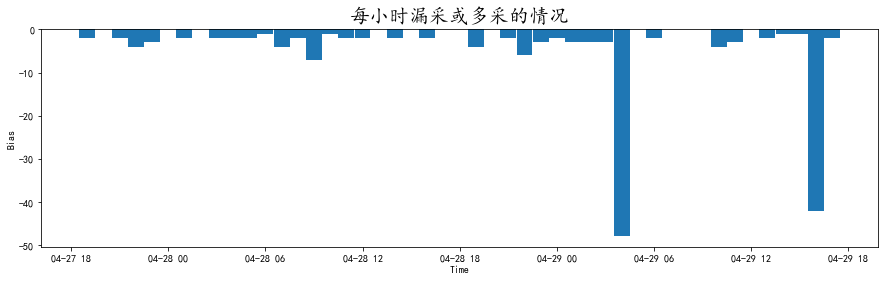

In [9]:
data_verification(df)

 - 采样频率为10,但个别秒存在多采或少采的情况
 - 每小时应该存在3600条数据，但实际上存在偏差，特别是2021-04-29 4时和16时的数据

# 2 数据预处理
 - 针对数据校验的结果，对数据进行进一步处理

#### 2.1 数据展开

In [10]:
df.sort_values(by="采集时间",axis=0,ascending=True,inplace=True)
df.drop_duplicates(subset=['采集时间'], keep='first', inplace=True)
df.reset_index(inplace=True)
del df['index']

In [11]:
df.head()

,测点编号,采集时间,纵桥向变位,横桥向变位,每秒采样频率
0,GNSS-G-06,2021-04-27 19:00:00,"[-5.035446361944196, -5.985044524095429, -3.69...","[-6.875547497656953, -6.876093430946639, -6.26...",10
1,GNSS-G-06,2021-04-27 19:00:01,"[-4.654586451579235, -5.619504232527106, -5.78...","[-6.803363609833468, -7.8833933439454995, -5.9...",10
2,GNSS-G-06,2021-04-27 19:00:02,"[-5.236091087681416, -4.8271419309458, -4.8424...","[-7.631296701219981, -5.580058223131346, -6.65...",10
3,GNSS-G-06,2021-04-27 19:00:03,"[-6.195899016347539, -5.794612947283895, -5.21...","[-8.35149663816992, -6.840001165073772, -5.832...",10
4,GNSS-G-06,2021-04-27 19:00:04,"[-6.17291955222754, -7.894455479799944, -5.799...","[-6.732271380315069, -7.596840719997999, -7.19...",10


In [12]:
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
##############################################################
def produce_unit(x):
    # 生成时间序列
    time_list = pd.date_range(start=x["采集时间"], periods=10, freq='100ms')
    # 生成加速度序列
    loc_y = x["纵桥向变位"]
    loc_x = x["横桥向变位"]
    if len(loc_y) < 10:
        nan_list = np.full(10-len(loc_y), np.nan)
        loc_y = np.append(loc_y,nan_list)
        loc_x = np.append(loc_x,nan_list)
    elif len(loc_y) > 10:
        loc_y = loc_y[:10]
        loc_x = loc_x[:10]
    return pd.DataFrame({'采集时间':time_list,'纵桥向变位':loc_y, '横桥向变位':loc_x})
    
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
# @dependencies: produce_unit
##############################################################
def prepossessing(df):
    intermediary = df.apply(lambda x: produce_unit(x), axis = 1, result_type = 'reduce')  # intermediary是一个Seriess，但每个数据是一个dataFrame
    result = intermediary[0]   # 初始化
    for i in range(1, len(intermediary)):
        # 判断是否不连续
        intervel = (intermediary[i]["采集时间"][0] - intermediary[i-1]["采集时间"][0]).seconds
        if (intervel > 1):
            adding = pd.DataFrame(
                {'采集时间':pd.date_range(start=intermediary[i-1]["采集时间"][0] + datetime.timedelta(minutes=1), periods=int(intervel -1)*10, freq='100ms'),
                 '纵桥向变位':np.full(int(intervel-1)*10, np.nan),
                 '横桥向变位':np.full(int(intervel-1)*10, np.nan)
                }
            ) 
            result = pd.concat([result,adding,intermediary[i]])
        else:
            result = pd.concat([result,intermediary[i]])
    result.reset_index(inplace = True)
    del result['index']
    return result

In [13]:
disposed_df = df.copy()
disposed_df = prepossessing(disposed_df)

In [14]:
disposed_df.to_csv('..\数据\浦仪夹江大桥数据4.27\disposed\跨中水平位移.csv')

#### 2.2 归一化

In [3]:
disposed_df = pd.read_csv('..\数据\浦仪夹江大桥数据5.4\disposed\跨中水平位移.csv',index_col=False)
del disposed_df['Unnamed: 0']

# def normalization(df,columns=[]):
#     for col in columns:
#         df[columns] = df[columns] / (df[columns].max() - df[columns].min())
#         df[columns] = df[columns] -  df[columns].mean()
#     return df

# cols = ['纵桥向变位','横桥向变位']
# disposed_df = normalization(disposed_df,cols)

In [4]:
disposed_df

,采集时间,纵桥向变位,横桥向变位
0,2021-05-04 00:00:00.000,-12.959474,-3.173901
1,2021-05-04 00:00:00.100,-10.877508,-3.676462
2,2021-05-04 00:00:00.200,-10.692183,-4.000197
3,2021-05-04 00:00:00.300,-10.692183,-4.000197
4,2021-05-04 00:00:00.400,-12.380526,-2.525884
...,...,...,...
1727925,2021-05-05 23:59:52.500,-6.883579,-3.278360
1727926,2021-05-05 23:59:52.600,-6.078449,-0.075455
1727927,2021-05-05 23:59:52.700,-7.817857,-2.199422
1727928,2021-05-05 23:59:52.800,-6.289308,-1.550859


#### 2.3 原始数据可视化

Text(0.5, 1.0, '水平方向位移')

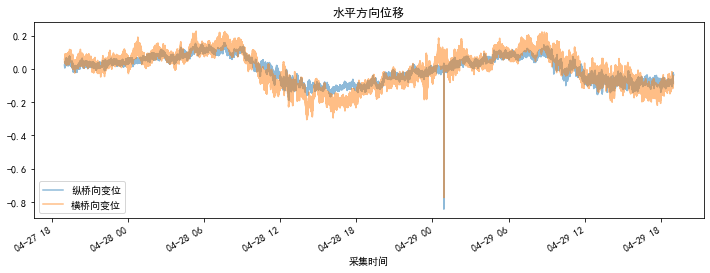

In [50]:
disposed_df['采集时间'] = disposed_df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')) 
disposed_df.index = disposed_df['采集时间']

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

disposed_df[['纵桥向变位','横桥向变位']].plot(figsize=(12,4), alpha=0.5)
plt.title('水平方向位移')

# 2 数据分析

#### 2.1 以十分钟为单位划分数据集
 - 计算窗体时间内的平均Vx、Vy、Vz和平均风速的风向
 - 计算紊流度：
     - Iu = sigma_vx/sqrt(vx^2+vy^2)
     - Iv = sigma_vy/sqrt(vx^2+vy^2)
     - Iw = sigma_vz/sqrt(vx^2+vy^2)

In [5]:
############################################################
# @desc：获取窗体时间内的统计值
# @param：
#     df：数据集
#     interval：窗体事件(/s)
############################################################
def get_stats(df, interval = 60*10, freq = 10):
    df["class"] = np.array(df.index.values / (freq*interval), dtype=int)
    result = df.groupby('class').agg({'采集时间':min, '纵桥向变位':[np.mean,np.std], '横桥向变位':[np.mean,np.std]}) 
    result.columns = ['采集时间','纵向变位平均值','纵向变位标准差', '横向变位平均值','横向变位标准差']
    return result

In [6]:
stats = get_stats(disposed_df, interval = 60*10, freq = 10)

In [7]:
stats

,采集时间,纵向变位平均值,纵向变位标准差,横向变位平均值,横向变位标准差
class,,,,,
0,2021-05-04 00:00:00.000,-3.973026,3.824383,1.159980,3.454180
1,2021-05-04 00:10:00.000,0.777098,3.090959,1.649264,2.912865
2,2021-05-04 00:20:00.000,3.074690,4.467873,3.427365,2.553951
3,2021-05-04 00:30:00.000,0.013802,2.279877,-3.696264,3.175842
4,2021-05-04 00:40:00.000,2.309694,5.135037,-10.692990,2.763664
...,...,...,...,...,...
283,2021-05-05 23:10:00.000,2.399571,6.895261,-3.428477,3.906439
284,2021-05-05 23:20:00.000,4.760715,5.418641,-0.558629,14.291200
285,2021-05-05 23:30:00.000,18.645767,10.314437,-6.567831,15.639623


In [8]:
stats.to_csv('..\数据\浦仪夹江大桥数据5.4\processed_data\跨中水平位移统计值.csv')